# 7.8.2 Splines

In [1]:
library(ISLR2)
attach(Wage)
agelims <- range(age)
age.grid <- seq(from = agelims[1], to = agelims[2])

We use the `splines` library to fit regression splines. Section 7.4 demonstrates how to fit regression splines by constructing an appropriate matrix of basis functions for splines with the specified set of knots. The `bs()` function generates the entire matrix of basis functions for splines with the specified set of knots. By default, cubic splines are produced. Fitting `wage` to `age` using a regression spline is simple:

In [2]:
library(splines)
fit <- lm(wage ~ bs(age, knots = c(25, 40, 60)), data = Wage)
pred <- predict(fit, newdata = list(age = age.grid), se = T)

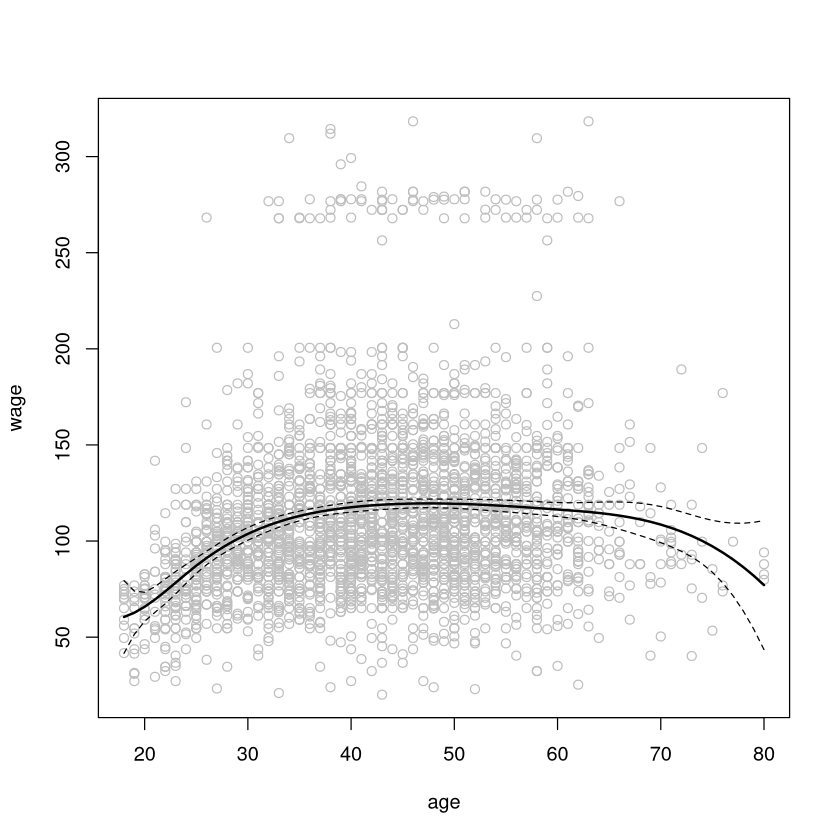

In [3]:
plot(age, wage, col = "gray")
lines(age.grid, pred$fit, lwd = 2)
lines(age.grid, pred$fit + 2 * pred$se, lty = "dashed")
lines(age.grid, pred$fit - 2 * pred$se, lty = "dashed")

Here we have prespecified knots at ages 25, 40, and 60. This produces a spline with six basis functions. (Recall that a cubic spline with three knots has seven degrees of freedom; these degrees of freedom are used up by an intercept, plus six basis functions.) We could also use the `df` option to produce a spline with knots at uniform quantiles of the data.

In [4]:
dim(bs(age, knots = c(25, 40, 60)))

[1] 3000    6

In [5]:
dim(bs(age, df = 6))

[1] 3000    6

In [6]:
at <- attr(bs(age, df = 6), "knots")
cat(" 25%   50% 75%\n", at)

 25%   50% 75%
 33.75 42 51

In this case `R` chooses knots at ages 33.8, 42.0, and 51.0, which correspond to the 25th, 50th, 75th percentiles of `age`. The function `bs()` also has a `degree` argument, so we can fit splines of any degree, rather than the defualt degree of 3 (which yields a cubic spline).  

In order to instead fit a natural spline, we use the `ns()` function. Here we fit a natural spline with four degrees of freedom.

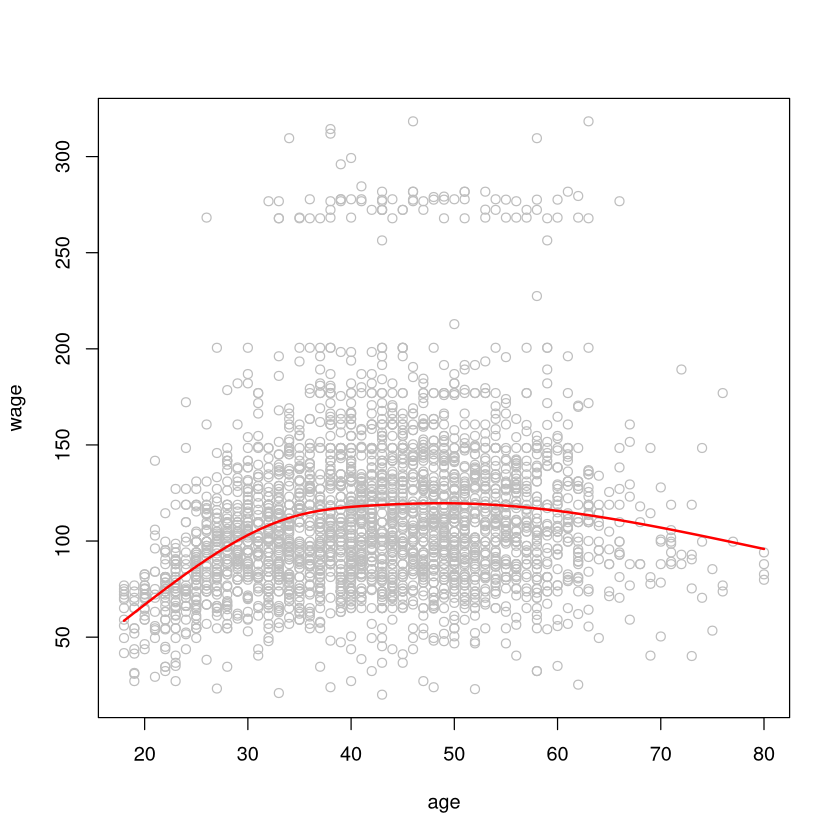

In [7]:
fit2 <- lm(wage ~ ns(age, df = 4), data = Wage)
pred2 <- predict(fit2, newdata = list(age = age.grid), se = T)
plot(age, wage, col = "gray")
lines(age.grid, pred2$fit, col = "red", lwd = 2)

As with the `bs()` function, we could instead specify the knots directly using the `knots` option.  

In order to fit a smoothing spline, we use the `smooth.spline()` function. Figure 7.8 was produced with the following code:

Warning message in smooth.spline(age, wage, cv = TRUE):
“cross-validation with non-unique 'x' values seems doubtful”


[1] 6.794596

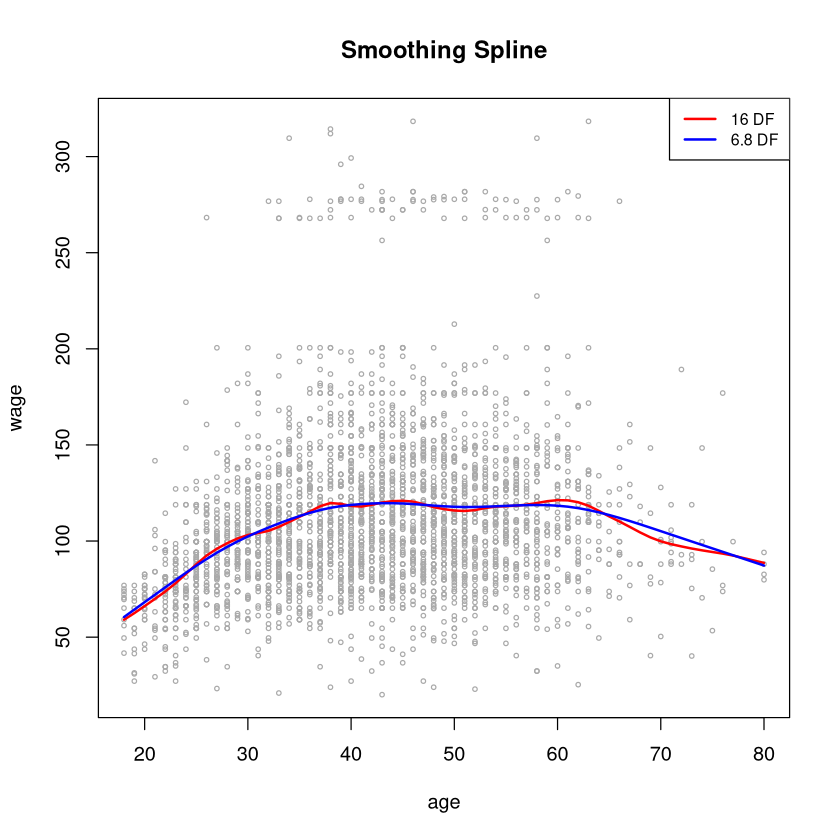

In [8]:
plot(age, wage, xlim = agelims, cex = .5, col = "darkgrey")
title("Smoothing Spline")
fit <- smooth.spline(age, wage, df = 16)
fit2 <- smooth.spline(age, wage, cv = TRUE)
fit2$df
lines(fit, col = "red", lwd = 2)
lines(fit2, col = "blue", lwd = 2)
legend("topright", legend = c("16 DF", "6.8 DF"),
  col = c("red", "blue"), lty = 1, lwd = 2, cex = .8)

Notice that in the first call to `smooth.spline()`, we specified `df = 16`. The function then determines which value of $\lambda$ leads to 16 degrees of freedom. In the second call to `smooth.spline()`, we select the smoothness level by cross-validation; this results in a value of $\lambda$ that results in 6.8 degrees of freedom.  

In order to perform local regression, we use the `loess()` function.

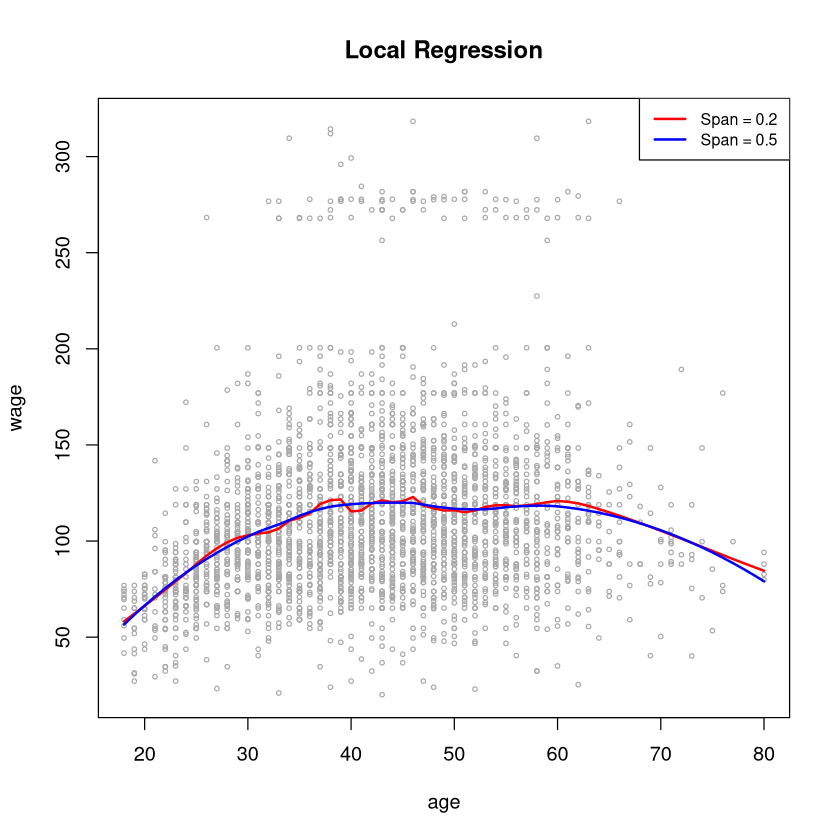

In [9]:
plot(age, wage, xlim = agelims, cex = .5, col = "darkgrey")
title("Local Regression")
fit <- loess(wage ~ age, span = .2, data = Wage)
fit2 <- loess(wage ~ age, span = .5, data = Wage)
lines(age.grid, predict(fit, data.frame(age = age.grid)), col = "red", lwd = 2)
lines(age.grid, predict(fit2, data.frame(age = age.grid)), col = "blue", lwd = 2)
legend("topright", legend = c("Span = 0.2", "Span = 0.5"), col = c("red", "blue"), lty = 1, lwd = 2, cex = .8)

Here we have performed local linear regression using spans of 0.2 and 0.5: that is, each neighborhood consists of 20% or 50% of the observations. THe larger the span, the smoother the fit. The `locfit` library can also be used for fitting local regression models in `R`.